# Using Local Sentence Embeddings to save API calls.
We can download a pre-trained embedding model and run it locally. This can save a lot of time of money and time.


In [ ]:
%%capture
!pip3 install sentence-transformers

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


In [4]:
from sentence_transformers import SentenceTransformer

sentences = [
    "Love good things and all humans, animals and be kind to the nature", 
    "kill all humans and animals and destroy the nature",
]

model = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2')
embeddings = model.encode(sentences)
print(f"Got embeddings with shape {embeddings.shape}")

Got embeddings with shape (2, 384)


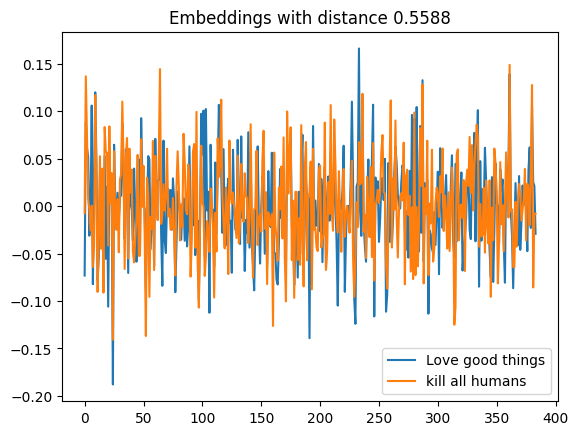

In [5]:
from matplotlib.pylab import plot, title, legend, show
import numpy as np

distance = embeddings[0] @ embeddings[1] / np.linalg.norm(embeddings[0]) / np.linalg.norm(embeddings[1])
for e, text in zip(embeddings, sentences):
    plot(e, label=text[:16])
legend()
title(f'Embeddings with distance {distance:6.4}')
show()

# TODO: Find 2 sentences with maximum distance.